In [1]:
from google.colab import files
uploaded = files.upload()

Saving XOR_trn.csv to XOR_trn.csv
Saving XOR_tst.csv to XOR_tst.csv


Este código muestra la implementación de una red neuronal para resolver el problema del operador lógico XOR. Aquí hay una descripción de la lógica detrás de este código:

**1.- Preparación de datos:**

> Se leen los datos de entrenamiento y prueba del archivo CSV utilizando Pandas.
La función normalize se utiliza para normalizar los datos entre 0 y 1, y se aplica a las características de entrada.



**2.- Función de activación:**

> Se define la función de activación sigmoide, comúnmente utilizada en capas ocultas de redes neuronales para introducir no linealidad en la red.



**3.- Clase de la red neuronal:**

> NeuralNetwork_XOR es la clase principal que contiene métodos para la propagación hacia adelante, hacia atrás, el cálculo de la pérdida, la inicialización de pesos, el entrenamiento y la predicción.
Los pesos (weights1 y weights2) se inicializan aleatoriamente y se ajustan durante el entrenamiento para optimizar la red.



**4.- Entrenamiento del modelo:**

> Se crea una instancia de la red neuronal (NeuralNetwork_XOR) y se entrenan tres modelos con diferentes inicializaciones de pesos.
Se selecciona el mejor modelo basado en la precisión en los datos de entrenamiento.



**5.- Evaluación del modelo:**

> Se evalúa la precisión del modelo seleccionado en los datos de entrenamiento y prueba.

Se visualiza la pérdida durante el entrenamiento y las predicciones del modelo en los datos de prueba, mostrando los datos reales y las predicciones.
En resumen, este código implementa una red neuronal simple para resolver el problema de XOR, una tarea clásica para demostrar la capacidad de las redes neuronales para modelar relaciones no lineales.


Training Accuracy: 100%


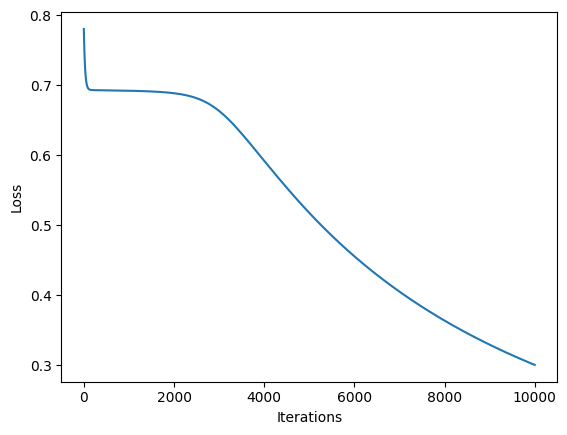

Test Accuracy: 100%


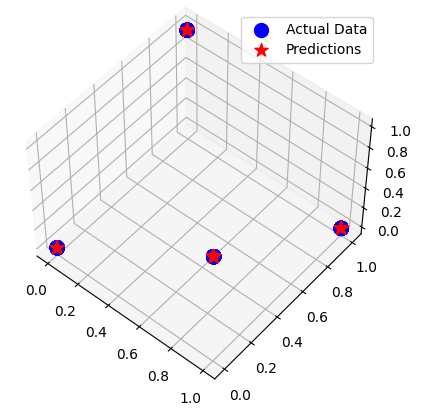

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics

# Lectura de los datos de entrenamiento y prueba
train_data = pd.read_csv('XOR_trn.csv', header=None)
test_data = pd.read_csv('XOR_tst.csv', header=None)

# Función para normalizar los datos entre 0 y 1
def normalize(data):
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    normalized = (data - min_vals) / (max_vals - min_vals)
    return np.vectorize(lambda x: 1 if x >= 0.5 else 0)(normalized)

# Preparación de los datos de entrenamiento y prueba
x_train = np.array([ normalize(train_data[0].values), normalize(train_data[1].values)])
y_train = np.array(train_data[2].replace(-1, 0).values)
x_test = np.array([normalize(test_data[0].values), normalize(test_data[1].values)])
y_test = np.array(test_data[2].replace(-1, 0).values)

# Función de activación: Sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

########## Clase para la red neuronal - XOR ##########
class NeuralNetwork_XOR:
    def __init__ (self, input_nodes = 2, output_nodes = 1, hidden_nodes = 2, learning_rate = 0.1, iterations = 10000):
        self.input_nodes = input_nodes
        self.output_nodes = output_nodes
        self.hidden_nodes = hidden_nodes
        self.weights1, self.weights2 = None, None
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.losses = []

    # Propagación hacia adelante
    def _forward_propagation(self, x):
        hidden_layer_input = np.dot(self.weights1, x)
        hidden_layer_output = sigmoid(hidden_layer_input)
        output_layer_input = np.dot(self.weights2, hidden_layer_output)
        output_layer_output = sigmoid(output_layer_input)
        return hidden_layer_input, hidden_layer_output, output_layer_input, output_layer_output

    # Propagación hacia atrás
    def _back_propagation(self, m, hidden_layer_input, hidden_layer_output, output_layer_input, output_layer_output, y, x):
        output_error = output_layer_output - y
        output_weights_gradient = np.dot(output_error, hidden_layer_output.T) / m
        hidden_error = np.dot(self.weights2.T, output_error) * hidden_layer_output * (1 - hidden_layer_output)
        hidden_weights_gradient = np.dot(hidden_error, x.T) / m
        hidden_weights_gradient = np.reshape(hidden_weights_gradient, self.weights1.shape)
        output_weights_gradient = np.reshape(output_weights_gradient, self.weights2.shape)
        return output_error, output_weights_gradient, hidden_error, hidden_weights_gradient

    # Cálculo de la pérdida
    def _compute_loss(self, y, output_layer_output, m):
        return -(1 / m) * np.sum(y * np.log(output_layer_output) + (1 - y) * np.log(1 - output_layer_output))

    # Inicialización de los pesos
    def initialize_weights (self):
        self.weights1 = np.random.rand(self.hidden_nodes, self.input_nodes)
        self.weights2 = np.random.rand(self.output_nodes, self.hidden_nodes)

    # Entrenamiento de la red neuronal
    def fit(self, x, y):
        m = x.shape[1]
        self.weights1 = np.random.rand(self.hidden_nodes, self.input_nodes)
        self.weights2 = np.random.rand(self.output_nodes, self.hidden_nodes)

        for i in range(self.iterations):
            hidden_layer_input, hidden_layer_output, output_layer_input, output_layer_output = self._forward_propagation(x)
            loss = self._compute_loss(y, output_layer_output, m)
            self.losses.append(loss)
            output_error, output_weights_gradient, hidden_error, hidden_weights_gradient = self._back_propagation(m, hidden_layer_input, hidden_layer_output, output_layer_input, output_layer_output, y, x)
            self.weights2 -= self.learning_rate * output_weights_gradient
            self.weights1 -= self.learning_rate * hidden_weights_gradient
        return self

    # Predicción de la red neuronal
    def predict(self, input_data):
        _, _, _, output = self._forward_propagation(input_data)
        return np.vectorize(lambda y: 1 if y >= 0.5 else 0)(np.squeeze(output))

# Creación del modelo de red neuronal y selección del mejor modelo según la precisión en los datos de entrenamiento
model = max(
    [NeuralNetwork_XOR(2, 1, 2) for i in range(0, 3)],
    key=lambda model: metrics.accuracy_score(y_train,model.fit(x_train, y_train).predict(x_train))
)

# Predicciones y precisión en datos de entrenamiento
train_predictions = model.predict(x_train)
train_accuracy = metrics.accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {int(train_accuracy * 100)}%')

# Visualización de la pérdida durante el entrenamiento
plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

# Predicciones y precisión en datos de prueba
test_predictions = model.predict(x_test)
test_accuracy = metrics.accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {int(test_accuracy * 100)}%')

# Visualización de los datos de prueba reales y las predicciones
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_test[0], x_test[1], y_test, c='b', marker='o', s=100, label="Actual Data")
ax.scatter(x_test[0], x_test[1], test_predictions, c='r', marker='*', s=100, label="Predictions")
ax.view_init(elev=50, azim=-50)
plt.legend()
plt.show()



Esta parte del código implementa una red neuronal para resolver un problema de clasificación con datos generados usando 'make_gaussian_quantiles' de Scikit-Learn. Aquí tienes un resumen de la lógica:

**Creación de datos Gaussian-quantiles:**

> Se generan datos usando 'make_gaussian_quantiles' que crea muestras a partir de distribuciones gaussianas con diferentes características.



**Normalización de datos:**

> Se define una función 'normalize' para normalizar los datos entre 0 y 1.



**Preparación de datos:**

> Los datos generados se normalizan y se dividen en conjuntos 'x_train' (características) e 'y_train' (etiquetas).



**Definición de la red neuronal:**

> Se define la clase NeuralNetwork_GaussianQuantiles para la red neuronal.

> Se inicializan los pesos, se implementa la función de activación ReLU y la función sigmoide, y se define la propagación hacia adelante (_forward_propagation) y hacia atrás (_back_propagation).



**Entrenamiento del modelo:**

> Se inicializa un modelo de red neuronal con capa de entrada de 2 nodos, capa oculta de 2 nodos y capa de salida de 1 nodo.

> El modelo se entrena usando los datos de entrenamiento (x_train e y_train) durante un número específico de iteraciones.

> Durante cada iteración, se realiza la propagación hacia adelante, se calcula la pérdida, se realiza la propagación hacia atrás y se actualizan los pesos.



**Predicción y evaluación del modelo:**

> Se hacen predicciones sobre los datos de entrenamiento.

> Se evalúa la precisión del modelo en los datos de entrenamiento usando 'metrics.accuracy_score'.



**Visualización de la pérdida:**

> Se muestra la gráfica de la pérdida durante el entrenamiento para visualizar cómo la pérdida cambia a lo largo de las iteraciones.



Este código implementa una red neuronal simple para resolver un problema de clasificación, utilizando datos generados con distribuciones gaussianas y luego entrenando el modelo para predecir estas clases.

Precisión de Entrenamiento para Cuantiles Gaussianos: 64%


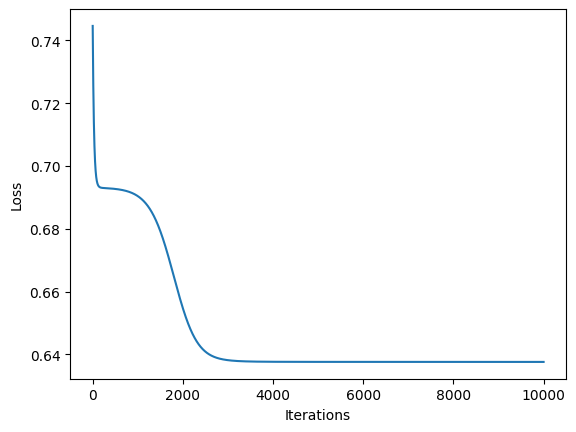

In [105]:
from sklearn.datasets import make_gaussian_quantiles

########## Creación de datos Gaussian-quantiles ##########
N = 1000  # Muestras
gaussian_quantiles = make_gaussian_quantiles(mean=None, cov=0.1, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
X, Y = gaussian_quantiles
Y = Y[:, np.newaxis]

# Función para normalizar los datos entre 0 y 1
def normalize(data):
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    normalized = (data - min_vals) / (max_vals - min_vals)
    return np.vectorize(lambda x: 1 if x >= 0.5 else 0)(normalized)

# Preparación de los datos
x_train = np.array([normalize(X[:, 0]), normalize(X[:, 1])])
y_train = np.array(Y.flatten())

class NeuralNetwork_GaussianQuantiles:
    def __init__(self, input_nodes=2, output_nodes=1, hidden_nodes=2, learning_rate=0.01, iterations=30000):
        self.input_nodes = input_nodes
        self.output_nodes = output_nodes
        self.hidden_nodes = hidden_nodes
        self.weights1, self.weights2 = None, None
        self.biases1, self.biases2 = None, None
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.losses = []

    def relu(self, z):
        return np.maximum(0, z)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _forward_propagation(self, x):
        hidden_layer_input = np.dot(self.weights1, x) + self.biases1
        hidden_layer_output = self.relu(hidden_layer_input)
        output_layer_input = np.dot(self.weights2, hidden_layer_output) + self.biases2
        output_layer_output = self.sigmoid(output_layer_input)
        return hidden_layer_input, hidden_layer_output, output_layer_input, output_layer_output

    # Propagación hacia atrás
    def _back_propagation(self, m, hidden_layer_input, hidden_layer_output, output_layer_input, output_layer_output, y, x):
        output_error = output_layer_output - y
        output_weights_gradient = np.dot(output_error, hidden_layer_output.T) / m
        hidden_error = np.dot(self.weights2.T, output_error) * hidden_layer_output * (1 - hidden_layer_output)
        hidden_weights_gradient = np.dot(hidden_error, x.T) / m
        hidden_weights_gradient = np.reshape(hidden_weights_gradient, self.weights1.shape)
        output_weights_gradient = np.reshape(output_weights_gradient, self.weights2.shape)
        return output_error, output_weights_gradient, hidden_error, hidden_weights_gradient

    # Cálculo de la pérdida
    def _compute_loss(self, y, output_layer_output, m):
        return -(1 / m) * np.sum(y * np.log(output_layer_output) + (1 - y) * np.log(1 - output_layer_output))

    # Inicialización de los pesos
    def initialize_weights (self):
        self.weights1 = np.random.rand(self.hidden_nodes, self.input_nodes)
        self.weights2 = np.random.rand(self.output_nodes, self.hidden_nodes)

    # Entrenamiento de la red neuronal
    def fit(self, x, y):
        m = x.shape[1]
        self.weights1 = np.random.rand(self.hidden_nodes, self.input_nodes)
        self.weights2 = np.random.rand(self.output_nodes, self.hidden_nodes)

        for i in range(self.iterations):
            hidden_layer_input, hidden_layer_output, output_layer_input, output_layer_output = self._forward_propagation(x)
            loss = self._compute_loss(y, output_layer_output, m)
            self.losses.append(loss)
            output_error, output_weights_gradient, hidden_error, hidden_weights_gradient = self._back_propagation(m, hidden_layer_input, hidden_layer_output, output_layer_input, output_layer_output, y, x)
            self.weights2 -= self.learning_rate * output_weights_gradient
            self.weights1 -= self.learning_rate * hidden_weights_gradient
        return self

    # Predicción de la red neuronal
    def predict(self, input_data):
        _, _, _, output = self._forward_propagation(input_data)
        return np.vectorize(lambda y: 1 if y >= 0.5 else 0)(np.squeeze(output))

# Creación del modelo de red neuronal y selección del mejor modelo según la precisión en los datos de entrenamiento
model_gaussian = max(
    [NeuralNetwork_XOR(2, 1, 2) for i in range(0, 3)],
    key=lambda model: metrics.accuracy_score(y_train, model.fit(x_train, y_train).predict(x_train))
)

# Predicciones y precisión en datos de entrenamiento
train_predictions_gaussian = model_gaussian.predict(x_train)
train_accuracy_gaussian = metrics.accuracy_score(y_train, train_predictions_gaussian)
print(f'Precisión de Entrenamiento para Cuantiles Gaussianos: {int(train_accuracy_gaussian * 100)}%')

# Visualización de la pérdida durante el entrenamiento
plt.plot(model_gaussian.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

